In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#  draft

In [49]:
df = pd.read_csv('raw.csv')

In [50]:
df

,No.,Trade Date,Type,Ticker,Direction,Call/Put,Currency,Spot Price,% to Strike,Strike,...,Broker,% Premium,Status,Premium ($),Delivery PnL,Combined PnL,Strategy,Notes,FX,Cum Premium
0,1,17-Aug-22,OTC - Stock,300012 CH,Sell,Put,CNY,20.89,4%,20.00,...,MS,1.78%,Expired,"$67,283",$0,"$67,283",NaN,NaN,0.142755,"$67,283"
1,2,18-Aug-22,OTC - Stock,300012 CH,Sell,Put,CNY,20.95,5%,20.00,...,MS,2.95%,Expired,"$38,386",$0,"$38,386",NaN,NaN,0.142755,"$105,669"
2,3,26-Aug-22,OTC - Stock,ONON US,Sell,Put,USD,16.56,-11%,18.66,...,MS,2.15%,Exercised,"$106,992","-$504,000","-$397,008",NaN,NaN,1.000000,"$212,661"
3,4,13-Sep-22,OTC - Stock,ONON US,Sell,Put,USD,17.14,-5%,18.00,...,MS,3.29%,Exercised,"$164,944","-$223,600","-$58,656",NaN,NaN,1.000000,"$377,605"
4,5,20-Sep-22,OTC - Stock,300012 CH,Sell,Put,CNY,20.35,4%,19.50,...,MS,1.32%,Expired,"$66,104",$0,"$66,104",NaN,NaN,0.138610,"$443,709"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,820,26-Feb-24,Listed - Stock,MRNA US,Sell,Put,USD,97.48,15%,85,...,UBS,1.29%,Active,"$12,721",$0,"$12,721",NaN,NaN,1.000000,"$8,244,537"
822,821,26-Feb-24,Listed - Stock,ONON US,Sell,Put,USD,34.25,22%,28,...,UBS,1.11%,Active,"$21,906",$0,"$21,906",NaN,NaN,1.000000,"$8,266,444"
823,822,27-Feb-24,Listed - Stock,BESI NA,Sell,Put,EUR,165.95,7%,155,...,MS,1.08%,Active,"$10,804",$0,"$10,804",NaN,NaN,1.081500,"$8,277,247"
824,823,27-Feb-24,Listed - Stock,UMG NA,Sell,Put,EUR,26.56,4%,25.5,...,MS,1.62%,Active,"$12,247",$0,"$12,247",NaN,NaN,1.081500,"$8,289,494"


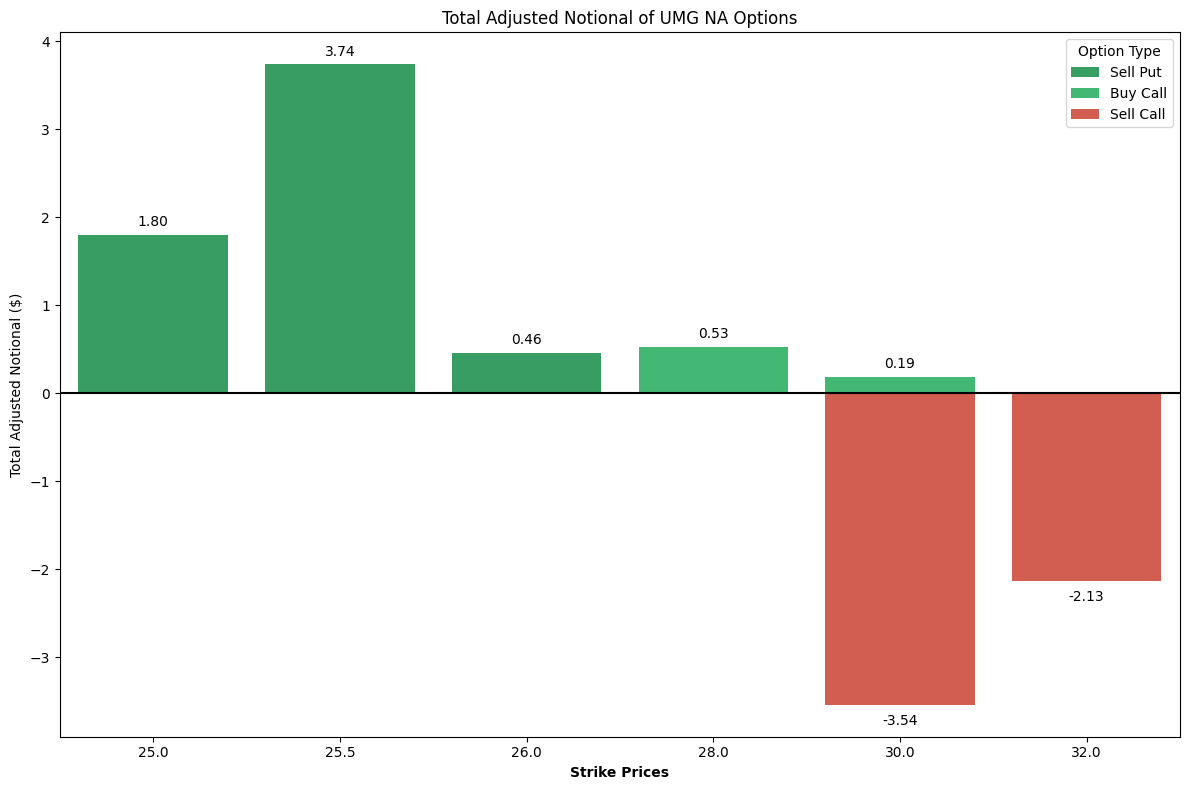

In [44]:
# Remove dollar sign and convert to float
df['Notl ($)'] = df['Notl ($)'].replace('[\$,]', '', regex=True).astype(float)

# Adjust the notional value for Buy Call and Sell Put
df['Adjusted Notl ($)'] = df.apply(lambda x: x['Notl ($)'] if x['Direction'] == 'Buy' and x['Call/Put'] == 'Call' or x['Direction'] == 'Sell' and x['Call/Put'] == 'Put' else -x['Notl ($)'], axis=1)

# Map the options types to colors
color_map = {
    ('Sell', 'Call'): 'red',
    ('Sell', 'Put'): 'blue',
    ('Buy', 'Call'): 'green',
    ('Buy', 'Put'): 'orange'
}
df['Color'] = df.apply(lambda x: color_map[(x['Direction'], x['Call/Put'])], axis=1)

# Group by Strike and Call/Put/Direction and sum the Adjusted Notl ($)
grouped_df = df.groupby(['Strike', 'Direction', 'Call/Put', 'Color'])['Adjusted Notl ($)'].sum().reset_index()

# Filter out notional values below 0.01
grouped_df = grouped_df[grouped_df['Adjusted Notl ($)'].abs() >= 0.01]

# Assuming you have a variable 'ticker' with the ticker name as a string
ticker = df['Ticker'][0]

# Define a color mapping for each trade type
color_mapping = {
    'Buy Call': '#2ecc71',  # Lighter green
    'Sell Put': '#27ae60',  # Darker green
    'Sell Call': '#e74c3c', # Lighter red
    'Buy Put': '#c0392b'    # Darker red
}


# Apply the color mapping
grouped_df['Trade Type'] = grouped_df['Direction'] + ' ' + grouped_df['Call/Put']
grouped_df['Color'] = grouped_df['Trade Type'].map(color_mapping)

# Plot using seaborn
plt.figure(figsize=(12, 8))

# Create the barplot
barplot = sns.barplot(data=grouped_df, x='Strike', y='Adjusted Notl ($)', hue='Trade Type', palette=color_mapping,dodge=False)

# Set title including the ticker name
plt.title(f'Total Adjusted Notional of {ticker} Options')
plt.xlabel('Strike Prices', fontweight='bold')
plt.ylabel('Total Adjusted Notional ($)')

# Remove gridlines
plt.grid(False)

# Add the numbers on top/below each bar, ignoring zero values
for p in barplot.patches:
    height = p.get_height()
    if height != 0:
        barplot.annotate(format(height, '.2f'),
                         (p.get_x() + p.get_width() / 2., height),
                         ha='center', va='center',
                         xytext=(0, 9 if height > 0 else -12),
                         textcoords='offset points')

# Set bold X-axis labels
plt.axhline(0, color='black', linewidth=1.5)

# Add legend
plt.legend(title='Option Type')

plt.tight_layout()
plt.show()

In [27]:
grouped_df

,Strike,Direction,Call/Put,Color,Adjusted Notl ($),Trade Type
0,25.0,Sell,Put,orange,1.80,Sell Put
1,25.5,Sell,Put,orange,3.74,Sell Put
2,26.0,Sell,Put,orange,0.46,Sell Put
4,28.0,Buy,Call,green,0.53,Buy Call
5,30.0,Buy,Call,green,0.19,Buy Call
6,30.0,Sell,Call,red,-3.54,Sell Call
7,32.0,Sell,Call,red,-2.13,Sell Call


# functions

In [55]:
def plot(df):
    # Remove dollar sign and convert to float
    df['Notl ($)'] = df['Notl ($)'].replace('[\$,]', '', regex=True).astype(float)

    # Adjust the notional value for Buy Call and Sell Put
    df['Adjusted Notl ($)'] = df.apply(lambda x: x['Notl ($)'] if x['Direction'] == 'Buy' and x['Call/Put'] == 'Call' or x['Direction'] == 'Sell' and x['Call/Put'] == 'Put' else -x['Notl ($)'], axis=1)

    # Map the options types to colors
    color_map = {
        ('Sell', 'Call'): 'red',
        ('Sell', 'Put'): 'blue',
        ('Buy', 'Call'): 'green',
        ('Buy', 'Put'): 'orange'
    }
    df['Color'] = df.apply(lambda x: color_map[(x['Direction'], x['Call/Put'])], axis=1)

    # Group by Strike and Call/Put/Direction and sum the Adjusted Notl ($)
    grouped_df = df.groupby(['Strike', 'Direction', 'Call/Put', 'Color'])['Adjusted Notl ($)'].sum().reset_index()

    # Filter out notional values below 0.01
    grouped_df = grouped_df[grouped_df['Adjusted Notl ($)'].abs() >= 0.01]

    # Assuming you have a variable 'ticker' with the ticker name as a string
    ticker = df['Ticker'].iloc[0]

    # Define a color mapping for each trade type
    color_mapping = {
        'Buy Call': '#2ecc71',  # Lighter green
        'Sell Put': '#27ae60',  # Darker green
        'Sell Call': '#e74c3c', # Lighter red
        'Buy Put': '#c0392b'    # Darker red
    }


    # Apply the color mapping
    grouped_df['Trade Type'] = grouped_df['Direction'] + ' ' + grouped_df['Call/Put']
    grouped_df['Color'] = grouped_df['Trade Type'].map(color_mapping)

    # Plot using seaborn
    plt.figure(figsize=(12, 8))

    # Create the barplot
    barplot = sns.barplot(data=grouped_df, x='Strike', y='Adjusted Notl ($)', hue='Trade Type', palette=color_mapping,dodge=False)

    # Set title including the ticker name
    plt.title(f'Total Adjusted Notional of {ticker} Options')
    plt.xlabel('Strike Prices', fontweight='bold')
    plt.ylabel('Total Adjusted Notional ($)')

    # Remove gridlines
    plt.grid(False)

    # Add the numbers on top/below each bar, ignoring zero values
    for p in barplot.patches:
        height = p.get_height()
        if height != 0:
            barplot.annotate(format(height, '.2f'),
                            (p.get_x() + p.get_width() / 2., height),
                            ha='center', va='center',
                            xytext=(0, 9 if height > 0 else -12),
                            textcoords='offset points')

    # Set bold X-axis labels
    plt.axhline(0, color='black', linewidth=1.5)

    # Add legend
    plt.legend(title='Option Type')

    plt.tight_layout()
    plt.show()

# Load the CSV file into a DataFrame
df = pd.read_csv('raw.csv')

df = df[df['Status'] == 'Active']

# Group the DataFrame by the 'Ticker' column
grouped = df.groupby('Ticker')

# Create a dictionary of sub-dataframes for each ticker
sub_dfs = {ticker: group for ticker, group in grouped}

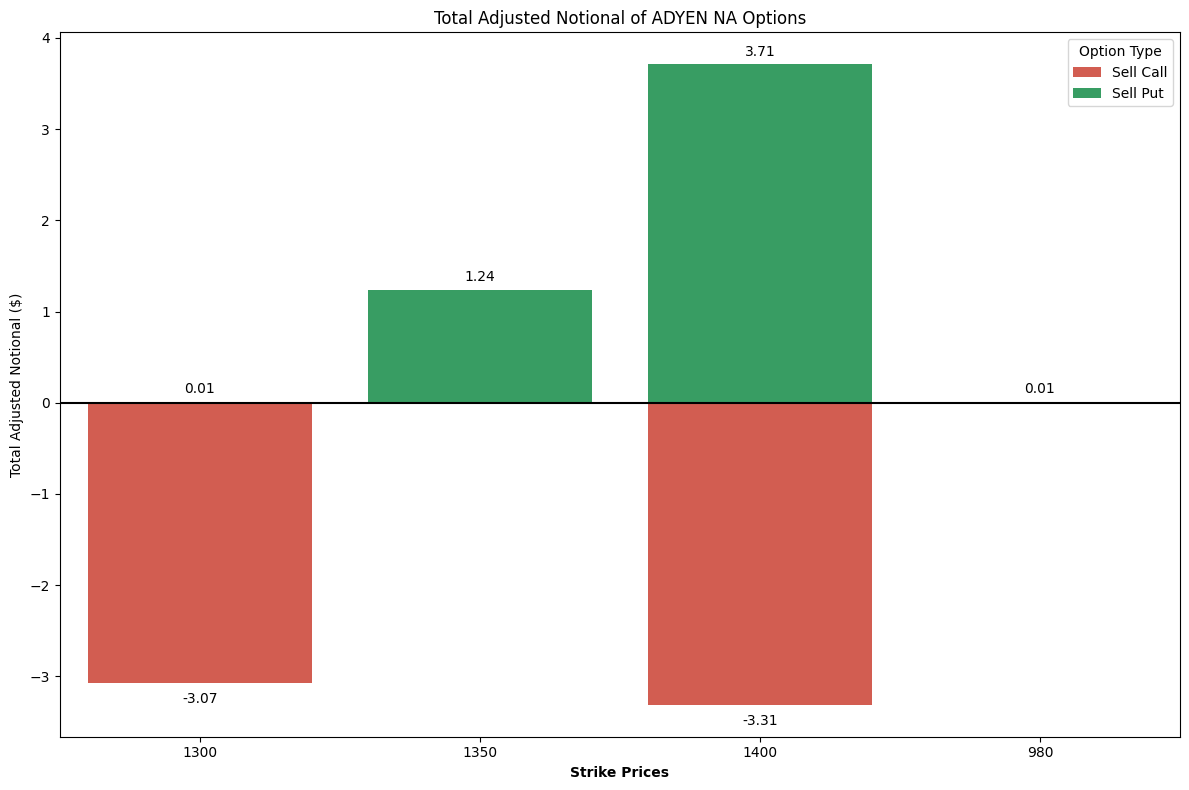

In [64]:
plot(df = sub_dfs['ADYEN NA'])